<a href="https://colab.research.google.com/github/kbdev20/Thesis/blob/main/pytorchSSD300_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this Google Colab notebook, we delve into a comparative study of various Convolutional Neural Network (CNN) models, emphasizing their application in object detection using dashcam images in vehicular environments. Unlike our previous focus on YOLO (You Only Look Once) models, we now explore other CNN architectures, including Faster R-CNN with ResNet50 backbone. Our primary objectives are to assess these models in terms of accuracy, prediction time efficiency, and resource utilization during object detection tasks.

# Loading the CNN Model (SSD300 with VGG16 Backbone)
In this section, we transition from the Ultralytics YOLO framework to another renowned CNN architecture for object detection: SSD300 with a VGG16 backbone. This shift involves using the PyTorch library and torchvision models, where we initialize the SSD300 model pre-trained with VGG16 weights.

In [1]:
import torch
from torchvision.models.detection import ssd300_vgg16
from torchvision.models.detection.ssd import SSD300_VGG16_Weights
from torchvision.transforms.functional import to_tensor

# Load the pre-trained weights for SSD
weights = SSD300_VGG16_Weights.DEFAULT
model = ssd300_vgg16(weights=weights, score_thresh=0.6)
model.eval()

# Initialize the inference transforms
preprocess = weights.transforms()


Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:00<00:00, 155MB/s]


---

#Data Loading and Preparation

In this cell, we have a function `LoadImagesAndLabels` which loads and processes images and their corresponding labels from the specified paths. After defining this utility function, we've set paths to our test data and then used the function to load the dataset into appropriate variables.

In [2]:
import os
import cv2
import torch
from pathlib import Path
from PIL import Image

def LoadImagesAndLabels(img_path, label_path):
    img_files = sorted([img_path/f for f in os.listdir(img_path) if f.endswith('.jpg') or f.endswith('.png')]) ## ez igy problémás mert a fájlnevek nem jó sorrendet állítanak igy összekeverednek a képek
    label_files = sorted([label_path/f for f in os.listdir(label_path) if f.endswith('.txt')])
    images = []
    dataset = []
    for img_file, label_file in zip(img_files, label_files):
        # Load image
        #img = cv2.imread(str(img_file))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = Image.open(img_file).convert("RGB")
        print(img.size)
        img = to_tensor(img)
        images.append(img)

        # Load labels
        with open(label_file, 'r') as file:
            labels = file.read().strip().split('\n')
            labels = [list(map(float, label.split())) for label in labels]
            labels = torch.tensor(labels, dtype=torch.float32)  # Convert to tensor

        dataset.append((img, labels))
        images.append(img)
    return dataset, images


# Define the path to your test data
img_path = Path('/content/drive/MyDrive/szakdoga/dashcamdatav1yoloformat/train/images')
label_path = Path('/content/drive/MyDrive/szakdoga/dashcamdatav1yoloformat/train/labels')

# Load the dataset
dataset, images = LoadImagesAndLabels(img_path, label_path)



(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(128

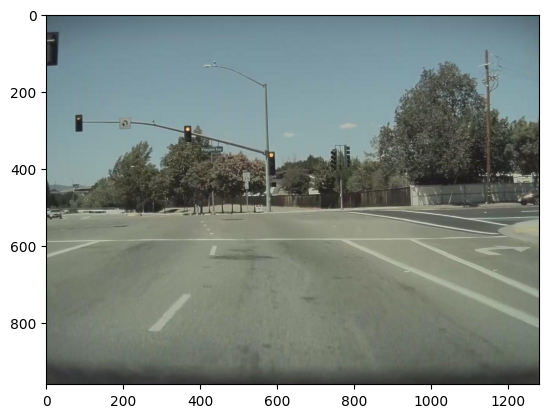

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import torchvision.transforms as transforms

# Load an example image and preprocess it
image_idx = 3  # Example image index
image = images[image_idx]  # This is already a tensor

# Convert tensor image to PIL for display
pil_img = transforms.ToPILImage()(image).convert("RGB")

# Run the model
model.eval()
with torch.no_grad():
    prediction = model([image])[0]

# Create figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(pil_img)

# Loop over the predictions and add a rectangle for each one
for box, label in zip(prediction["boxes"], prediction["labels"]):
    # Extract bounding box coordinates
    xmin, ymin, xmax, ymax = box

    # Create a rectangle patch
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    # Add the class label text
    label_name = weights.meta["categories"][label.item()]
    plt.text(xmin, ymin, label_name, fontsize=12, color='white',
             bbox=dict(facecolor='red', edgecolor='none', boxstyle='round4,pad=0.1', alpha=0.7))

# Show the plot
plt.show()


# Model Execution and Performance Timing
In this section, we assess the execution and timing performance of the SSD300 model (with VGG16 backbone). Our focus is on measuring and analyzing the time consumed during different stages of the prediction process.

1. Timing Predictions:
We record the time taken for both preprocessing and model predictions, storing these durations in separate lists (preprocess_times, model_times).
The timing is measured separately for GPU and CPU executions, enabling a comparison of performance across different computing resources.

2. Summary Statistics:
Total and average times for both preprocessing and model prediction phases are calculated for all test images.

3. Visualization:
Using matplotlib, we visually represent the timing data.
We plot the duration of preprocessing and model predictions for each image on both GPU and CPU.


Time measurement with gpu

In [4]:
import time
import torch
import numpy as np

# Assuming `preprocess` and `model` are defined
# Assuming `dataset` is available

# Check if GPU is available and use it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Lists to store times
preprocess_times_gpu = []
model_times_gpu = []

start_total_gpu = time.time()

for _ in range(3):
    for img, labels in dataset:
        # Move image to GPU for preprocessing (if applicable)
        img_gpu = img.to(device)

        # Preprocessing time on GPU
        torch.cuda.synchronize(device)
        start_pre_gpu = time.time()
        preprocessed_img_gpu = preprocess(img_gpu)
        torch.cuda.synchronize(device)
        end_pre_gpu = time.time()
        preprocess_times_gpu.append(end_pre_gpu - start_pre_gpu)

        # Model prediction time on GPU
        torch.cuda.synchronize(device)
        start_model_gpu = time.time()
        results = model([preprocessed_img_gpu])
        torch.cuda.synchronize(device)
        end_model_gpu = time.time()
        model_times_gpu.append(end_model_gpu - start_model_gpu)

end_total_gpu = time.time() - start_total_gpu

# Calculate and print GPU times
avg_preprocess_time_gpu = np.mean(preprocess_times_gpu)
total_preprocess_time_gpu = sum(preprocess_times_gpu)
avg_model_time_gpu = np.mean(model_times_gpu)
total_model_time_gpu = sum(model_times_gpu)

print("GPU Processing:")
print(f"Average Preprocessing Time: {avg_preprocess_time_gpu}")
print(f"Total Preprocessing Time: {total_preprocess_time_gpu}")
print(f"Average Model Prediction Time: {avg_model_time_gpu}")
print(f"Total Model Prediction Time: {total_model_time_gpu}")
print(f"Total Time (Preprocessing + Prediction): {end_total_gpu}")


GPU Processing:
Average Preprocessing Time: 4.712639555419232e-05
Total Preprocessing Time: 0.033365488052368164
Average Model Prediction Time: 0.042664264891780705
Total Model Prediction Time: 30.206299543380737
Total Time (Preprocessing + Prediction): 32.59389138221741


gpu plot

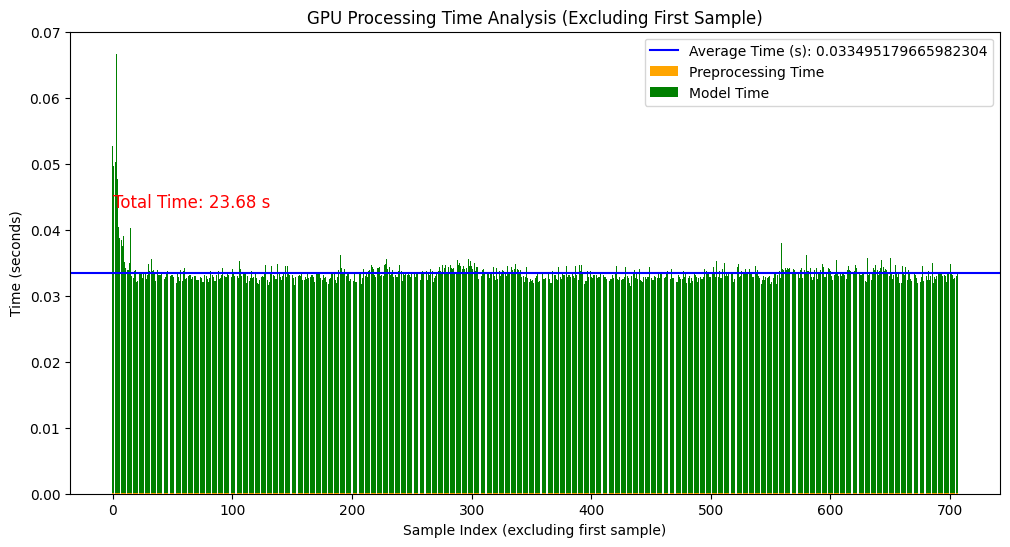

In [5]:
import matplotlib.pyplot as plt


# Exclude the first value from each list
preprocess_times_gpu_excluding_first = preprocess_times_gpu[1:]
model_times_gpu_excluding_first = model_times_gpu[1:]

# Combine preprocessing and model times for stacked bar chart, excluding the first value
combined_times_excluding_first = [preprocess_time + model_time for preprocess_time, model_time in zip(preprocess_times_gpu_excluding_first, model_times_gpu_excluding_first)]

# Recalculate total and average times excluding the first value
total_preprocess_time = sum(preprocess_times_gpu_excluding_first)
avg_preprocess_time = total_preprocess_time / len(preprocess_times_gpu_excluding_first)
total_model_time = sum(model_times_gpu_excluding_first)
avg_model_time = total_model_time / len(model_times_gpu_excluding_first)
total_time = total_preprocess_time + total_model_time
avg_time = total_time / len(combined_times_excluding_first)

# Create a wide plot
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figsize for desired width

# Create stacked bar chart excluding the first value
ax.bar(range(len(preprocess_times_gpu_excluding_first)), preprocess_times_gpu_excluding_first, label='Preprocessing Time', color='orange')
ax.bar(range(len(model_times_gpu_excluding_first)), model_times_gpu_excluding_first, bottom=preprocess_times_gpu_excluding_first, label='Model Time', color='green')

# Average time horizontal line
ax.axhline(y=avg_time, color="b", linestyle="-", label=f"Average Time (s): {avg_time}")

# Display total time
ax.text(0, avg_time + 0.01, f'Total Time: {total_time:.2f} s', color='r', fontsize=12)

# Set labels and title
ax.set_xlabel('Sample Index (excluding first sample)')
ax.set_ylabel('Time (seconds)')
ax.set_title('GPU Processing Time Analysis (Excluding First Sample)')
ax.legend()

plt.show()


cpu time measurement

In [6]:
import time
import torch
import numpy as np

# Assuming `preprocess` and `model` are defined
# Assuming `dataset` is available

# Ensure the model is on the CPU
model.to('cpu')

# Lists to store times
preprocess_times_cpu = []
model_times_cpu = []

start_total_cpu = time.time()

for _ in range(3):
    for img, labels in dataset:
        # Preprocessing time on CPU
        start_pre_cpu = time.time()
        preprocessed_img_cpu = preprocess(img)
        end_pre_cpu = time.time()
        preprocess_times_cpu.append(end_pre_cpu - start_pre_cpu)

        # Model prediction time on CPU
        start_model_cpu = time.time()
        results = model([preprocessed_img_cpu])
        end_model_cpu = time.time()
        model_times_cpu.append(end_model_cpu - start_model_cpu)

end_total_cpu = time.time() - start_total_cpu

# Calculate and print CPU times
avg_preprocess_time_cpu = np.mean(preprocess_times_cpu)
total_preprocess_time_cpu = sum(preprocess_times_cpu)
avg_model_time_cpu = np.mean(model_times_cpu)
total_model_time_cpu = sum(model_times_cpu)

print("CPU Processing:")
print(f"Average Preprocessing Time: {avg_preprocess_time_cpu}")
print(f"Total Preprocessing Time: {total_preprocess_time_cpu}")
print(f"Average Model Prediction Time: {avg_model_time_cpu}")
print(f"Total Model Prediction Time: {total_model_time_cpu}")
print(f"Total Time (Preprocessing + Prediction): {end_total_cpu}")


CPU Processing:
Average Preprocessing Time: 2.6453012800486073e-05
Total Preprocessing Time: 0.01872873306274414
Average Model Prediction Time: 0.3416628416648692
Total Model Prediction Time: 241.89729189872742
Total Time (Preprocessing + Prediction): 241.91977453231812


cpu time plot

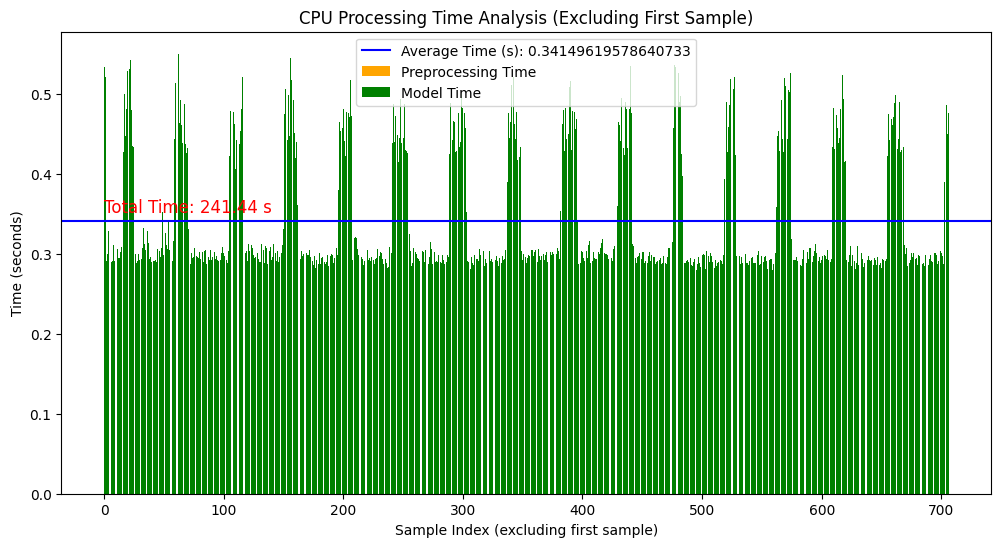

In [7]:
import matplotlib.pyplot as plt

# Exclude the first value from each list
preprocess_times_cpu_excluding_first = preprocess_times_cpu[1:]
model_times_cpu_excluding_first = model_times_cpu[1:]

# Combine preprocessing and model times for stacked bar chart, excluding the first value
combined_times_cpu_excluding_first = [preprocess_time + model_time for preprocess_time, model_time in zip(preprocess_times_cpu_excluding_first, model_times_cpu_excluding_first)]

# Recalculate total and average times excluding the first value
total_preprocess_time_cpu = sum(preprocess_times_cpu_excluding_first)
avg_preprocess_time_cpu = total_preprocess_time_cpu / len(preprocess_times_cpu_excluding_first)
total_model_time_cpu = sum(model_times_cpu_excluding_first)
avg_model_time_cpu = total_model_time_cpu / len(model_times_cpu_excluding_first)
total_time_cpu = total_preprocess_time_cpu + total_model_time_cpu
avg_time_cpu = total_time_cpu / len(combined_times_cpu_excluding_first)

# Create a wide plot
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figsize for desired width

# Create stacked bar chart excluding the first value
ax.bar(range(len(preprocess_times_cpu_excluding_first)), preprocess_times_cpu_excluding_first, label='Preprocessing Time', color='orange')
ax.bar(range(len(model_times_cpu_excluding_first)), model_times_cpu_excluding_first, bottom=preprocess_times_cpu_excluding_first, label='Model Time', color='green')

# Average time horizontal line
ax.axhline(y=avg_time_cpu, color="b", linestyle="-", label=f"Average Time (s): {avg_time_cpu}")

# Display total time
ax.text(0, avg_time_cpu + 0.01, f'Total Time: {total_time_cpu:.2f} s', color='r', fontsize=12)

# Set labels and title
ax.set_xlabel('Sample Index (excluding first sample)')
ax.set_ylabel('Time (seconds)')
ax.set_title('CPU Processing Time Analysis (Excluding First Sample)')
ax.legend()

plt.show()


###Resource Consumption Analysis
A crucial aspect of evaluating model performance is understanding its resource consumption. This entails observing how the model utilizes available computing resources, primarily GPU and CPU, during its execution. Proper monitoring can help in optimizations and making informed decisions about deployment. This segment will break down the resource usage for both GPU and CPU while executing the model on the dataset.

#GPU Resource Consumption
Summary:
In the GPU segment, we focus on tracking the GPU's utilization and memory usage while the model processes the dataset. Using the NVIDIA System Management Interface (nvidia-smi) and the PyNVML library, we can query the GPU's health metrics. These metrics are essential to understand how efficiently our model uses GPU resources and to pinpoint any potential bottlenecks or issues.

First, we install and display GPU stats using gpustat and nvidia-smi.
Next, we define a utility function get_gpu_resource_usage that returns the current GPU utilization and memory usage.
The model is transferred to the GPU using PyTorch's .to(device) method.
During the execution of each image through the model, we record the GPU's resource metrics.
Finally, these metrics are visualized to show the GPU's usage and memory consumption over time.

In [8]:
!pip install gpustat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.9 MB/s eta 0:00:00
  Created wheel for gpustat: filename=gpustat-1.1.1-py3-none-any.whl size=26535 sha256=8c1efbf72e75218981bd5c9a8b1852641bba83ce82593caf8116fec125f03275
  Stored in directory: /root/.cache/pip/wheels/ec/d7/80/a71ba3540900e1f276bcae685efd8e590c810d2108b95f1e47
Successfully built gpustat


In [9]:
import subprocess
import re

def get_gpu_utilization():
    try:
        result = subprocess.run(['nvidia-smi', '--query-gpu=utilization.gpu', '--format=csv,noheader'],
                                text=True, capture_output=True, check=True)
        utilization_strs = result.stdout.strip().split('\n')
        # Parse the utilization percentages from the output
        utilization = []
        for util_str in utilization_strs:
            match = re.search(r'(\d+)\s*%', util_str)
            if match:
                utilization.append(int(match.group(1)))
            else:
                print(f'Warning: Could not parse utilization from string: {util_str}')
        return utilization
    except subprocess.CalledProcessError as e:
        print(f'Error: {e.output}')
        return None
    except FileNotFoundError:
        print('Error: nvidia-smi not found. Is an NVIDIA driver installed?')
        return None




In [10]:

!nvidia-smi



Sun Nov 26 23:38:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    27W /  70W |   1751MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
import pynvml as nvml
import torch

gpu_usage = []
gpu_mem_usage = []

def get_gpu_resource_usage():
    nvml.nvmlInit()
    handle = nvml.nvmlDeviceGetHandleByIndex(0)
    gpu_utilization = nvml.nvmlDeviceGetUtilizationRates(handle).gpu
    gpu_memory_info = nvml.nvmlDeviceGetMemoryInfo(handle).used / (1024**2)  # Convert to MB
    nvml.nvmlShutdown()

    return gpu_utilization, gpu_memory_info

# Record initial GPU resource usage
initial_gpu, initial_gpu_mem = get_gpu_resource_usage()

device = torch.device("cuda:0")
model = model.to(device)

# Run the model on each image in the test dataset
for i in range(3):
  for img, labels in dataset:
      gpu, gpu_mem = get_gpu_resource_usage()
      img = img.to(device)
      #img = preprocess(img)
      # Run the model
      model.eval()
      with torch.no_grad():
          results = model([img])

      gpu_usage.append(gpu)
      gpu_mem_usage.append(gpu_mem)

      print(f'GPU Utilization: {gpu}%')
      print(f'GPU Memory Usage: {gpu_mem:.2f} MB')

# Record final GPU resource usage
final_gpu, final_gpu_mem = get_gpu_resource_usage()

# Output the final GPU resource consumption
print(f'Final GPU Utilization: {final_gpu}%')
print(f'Final GPU Memory Usage: {final_gpu_mem:.2f} MB')




GPU Utilization: 0%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 0%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 44%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 44%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 44%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 44%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 69%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 69%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 69%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 69%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 69%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 58%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 58%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 58%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 58%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 58%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 58%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 54%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 54%
GPU Memory Usage: 2009.19 MB
GPU Utilization: 54%
GPU Memory Usage: 2009.19 MB
GP

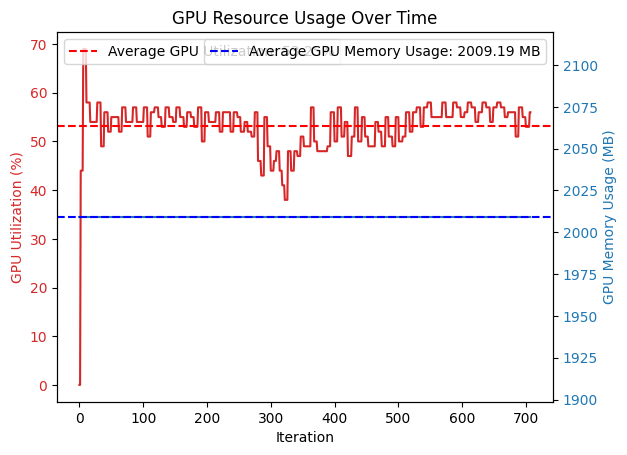

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# plot the data
fig, ax1 = plt.subplots()

# Plot GPU Utilization
color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('GPU Utilization (%)', color=color)
ax1.plot(gpu_usage, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('GPU Memory Usage (MB)', color=color)
ax2.plot(gpu_mem_usage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Calculate and plot the averages
avg_gpu = np.mean(gpu_usage)
avg_gpu_mem = np.mean(gpu_mem_usage)
ax1.axhline(y=avg_gpu, color='red', linestyle='--', label=f'Average GPU Utilization: {avg_gpu:.2f}%')
ax2.axhline(y=avg_gpu_mem, color='blue', linestyle='--', label=f'Average GPU Memory Usage: {avg_gpu_mem:.2f} MB')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.title('GPU Resource Usage Over Time')
plt.show()


#CPU Resource Consumption
Summary:
The CPU resource analysis tracks the CPU's utilization and the system's memory usage as the model processes the dataset on the CPU. For this, we make use of the psutil library, which provides an interface to retrieve information on system utilization.

We define a utility function get_resource_usage that returns the current CPU usage percentage and used memory.
The model is shifted to the CPU.
As the model processes each image, we capture the CPU's usage and system memory metrics.
At the end, these metrics are plotted to visualize the CPU's usage and system memory consumption during the model's execution.
By the conclusion of this segment, we have a clearer understanding of the model's behavior in terms of resource consumption, which can guide optimization efforts and deployment considerations.

In [13]:
import psutil
import time

cpu_usage = []
mem_usage = []

def get_resource_usage():
    cpu_usage = psutil.cpu_percent(interval=1)  # Get CPU usage percentage, averaged over 1 second
    memory_usage = psutil.virtual_memory().used  # Get the used memory in bytes
    return cpu_usage, memory_usage

# Record initial resource usage
initial_cpu, initial_mem = get_resource_usage()



device = torch.device("cpu")
#print(model.device)
model = model.to(device)
#print(model.device)
# Run the model on each image in the test dataset
for i in range(3):
  for img, labels in dataset:
      cpu, mem = get_resource_usage()
      model.eval()
      with torch.no_grad():
        results = model([img])
      mem_usage.append(mem)
      cpu_usage.append(cpu)
      print((mem)/ (1024 ** 2) , "MB")
      print(f'CPU Usage: {cpu}%')

# Record final resource usage
final_cpu, final_mem = get_resource_usage()

# Calculate the difference in resource usage
cpu_usage_diff = final_cpu
mem_usage_diff = final_mem

# Output the resource consumption
print(f'CPU Usage: {cpu_usage_diff}%')
print(f'Memory Usage: {mem_usage_diff / (1024 ** 2):.2f} MB')  # Convert bytes to megabytes



8167.01953125 MB
CPU Usage: 13.1%
8143.33203125 MB
CPU Usage: 1.0%
8151.8046875 MB
CPU Usage: 0.7%
8179.5625 MB
CPU Usage: 1.6%
8184.6953125 MB
CPU Usage: 1.1%
8179.640625 MB
CPU Usage: 0.9%
8179.73046875 MB
CPU Usage: 0.6%
8220.90625 MB
CPU Usage: 20.0%
8315.484375 MB
CPU Usage: 42.6%
8405.3359375 MB
CPU Usage: 35.7%
8463.27734375 MB
CPU Usage: 38.8%
8530.7890625 MB
CPU Usage: 26.3%
8543.44140625 MB
CPU Usage: 29.3%
8583.1328125 MB
CPU Usage: 26.5%
8603.3828125 MB
CPU Usage: 1.9%
8603.9765625 MB
CPU Usage: 0.9%
8604.33203125 MB
CPU Usage: 0.6%
8608.38671875 MB
CPU Usage: 0.8%
8641.6796875 MB
CPU Usage: 13.3%
8641.125 MB
CPU Usage: 13.2%
8647.61328125 MB
CPU Usage: 9.0%
8640.06640625 MB
CPU Usage: 0.7%
8639.62109375 MB
CPU Usage: 0.7%
8639.24609375 MB
CPU Usage: 0.6%
8638.59765625 MB
CPU Usage: 0.7%
8638.71484375 MB
CPU Usage: 0.9%
8638.33984375 MB
CPU Usage: 0.6%
8630.0390625 MB
CPU Usage: 0.5%
8634.5390625 MB
CPU Usage: 12.3%
8645.6875 MB
CPU Usage: 13.4%
8649.16796875 MB
CPU Usage: 

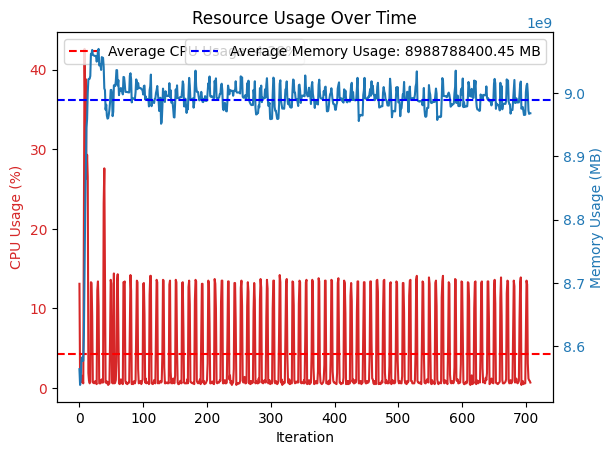

In [14]:
# plot the data
fig, ax1 = plt.subplots()

# Plot CPU usage
color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('CPU Usage (%)', color=color)
ax1.plot(cpu_usage, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Memory Usage (MB)', color=color)
ax2.plot(mem_usage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Calculate and plot the averages
avg_cpu = np.mean(cpu_usage)
avg_mem = np.mean(mem_usage)
ax1.axhline(y=avg_cpu, color='red', linestyle='--', label=f'Average CPU Usage: {avg_cpu:.2f}%')
ax2.axhline(y=avg_mem, color='blue', linestyle='--', label=f'Average Memory Usage: {avg_mem:.2f} MB')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.title('Resource Usage Over Time')
plt.show()


In [15]:
torch.cuda.is_available()


True

# Model Evaluation and Visualization
This code is for evaluating an object detection model, focusing on prediction accuracy and visualization. It involves data preprocessing, prediction analysis, and visual representation of model performance.

Code Breakdown:
1. Data Preparation
Import necessary libraries.
Generate predictions and corresponding labels from the model.
2. Label and Prediction Processing
Flatten and reformat labels and predictions for analysis.
3. IoU Calculation
Implement a function to calculate the Intersection Over Union (IoU) between bounding boxes.
4. Matching and Analyzing Boxes
Match predicted boxes with true boxes and analyze overlaps.
5. Visualization of Boxes
Visualize true and predicted boxes on images.
6. Bounding Box Labeling
Draw bounding boxes and class names on images, and correct class labels.
7. Class Label Filtering
Filter and correct class labels for evaluation.
8. Evaluation Metrics
Compute accuracy, precision, recall, F1-Score, and mean IoU.
9. Metrics Visualization
Plot confusion matrix and IoU histogram.
10. Model Benchmarking
Benchmark the model using Ultralytics tools.

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

## Data Preparation: Sets up the environment and prepares the dataset for prediction using the model.

The evaluation is originaly created for yolo with xywh, but Faster R-CNN uses xyxy format so the bounding boxes must be converted to the yolo format before evaluation

In [17]:
def convert_and_normalize(predictions, img_width, img_height):
    """
    Convert the bounding box format from Faster R-CNN to normalized XYWH format.

    predictions: list of dictionaries containing 'boxes' and 'image_id'.
    img_width: width of the images (assuming all images are of the same dimensions).
    img_height: height of the images.

    Returns a list of predictions in the normalized XYWH format.
    """
    normalized_predictions = []

    for pred in predictions:
        # Extract bounding box coordinates
        xmin, ymin, xmax, ymax = pred['bbox']

        # Convert from (xmin, ymin, xmax, ymax) to (x_center, y_center, width, height)
        x_center = (xmin + xmax) / 2
        y_center = (ymin + ymax) / 2
        width = xmax - xmin
        height = ymax - ymin

        # Normalize the coordinates
        x_center /= img_width
        y_center /= img_height
        width /= img_width
        height /= img_height

        # Prepare the normalized prediction dictionary
        normalized_pred = {
            'image_id': pred['image_id'],
            'class': pred['class'],
            'bbox': [x_center, y_center, width, height]
        }

        normalized_predictions.append(normalized_pred)

    return normalized_predictions


In [18]:

predictions = []
test_labels = []

# Place model in evaluation mode
model.eval()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Transfer the model to the chosen device
model = model.to(device)
for img, labels in dataset:
    # Check if the image is a tensor. If not, convert it.
    if not torch.is_tensor(img):
        img = to_tensor(img)

    # Add batch dimension and send to the device
    img_tensor = img.unsqueeze(0).to(device)

    with torch.no_grad():
        results = model(img_tensor)[0]

    # Append the results and labels
    predictions.append(results)
    test_labels.append(labels)


Using device: cuda:0


## Label and Prediction Processing: Converts model outputs into a structured format for easy analysis.

In [19]:
flattened_labels = []
for image_idx, tensor in enumerate(test_labels):  # Assuming test_labels is a list of tensors
    if isinstance(tensor, torch.Tensor):  # Check if tensor is a torch.Tensor
        if tensor.dim() == 2 and tensor.size(1) == 5:  # Check if tensor has correct dimensions
            for i in range(tensor.size(0)):  # Iterate over rows in tensor
                row = tensor[i]
                class_label, x, y, width, height = row
                flattened_labels.append({
                    'image_id': image_idx,
                    'class': int(class_label.item()),
                    'bbox': [float(coord.item()) for coord in [x, y, width, height]]
                })
        else:
          flattened_labels.append({
                    'image_id': image_idx,
                    'class': -1,
                    'bbox': -1
                })


# Now flattened_labels is a list of dictionaries, each containing an image ID, class label, and bounding box coordinates


print(flattened_labels)


[{'image_id': 0, 'class': 6, 'bbox': [0.15906250476837158, 0.21595832705497742, 0.025648437440395355, 0.06679166853427887]}, {'image_id': 0, 'class': 6, 'bbox': [0.9070390462875366, 0.324072927236557, 0.042781248688697815, 0.13831250369548798]}, {'image_id': 0, 'class': 6, 'bbox': [0.14031249284744263, 0.32623958587646484, 0.014421874657273293, 0.03967708349227905]}, {'image_id': 0, 'class': 6, 'bbox': [0.32111719250679016, 0.35335415601730347, 0.015367187559604645, 0.03696874901652336]}, {'image_id': 0, 'class': 5, 'bbox': [0.3581562638282776, 0.38888540863990784, 0.04067187383770943, 0.017937500029802322]}, {'image_id': 0, 'class': 6, 'bbox': [0.45851561427116394, 0.421875, 0.02071874961256981, 0.06308333575725555]}, {'image_id': 0, 'class': 5, 'bbox': [0.4146796762943268, 0.4560208320617676, 0.021593749523162842, 0.04803124815225601]}, {'image_id': 0, 'class': 2, 'bbox': [0.048828125, 0.5311041474342346, 0.024257812649011612, 0.019239583984017372]}, {'image_id': 1, 'class': 5, 'bbox

In [20]:
# Print class labels, probabilities, and bounding boxes for each prediction
for i, prediction in enumerate(predictions):
    if len(prediction['labels']) > 0:
        print(f"Image {i} Predictions:")
        for label, score, bbox in zip(prediction['labels'], prediction['scores'], prediction['boxes']):
            # Convert bounding box tensor to a list of coordinates
            bbox_coords = bbox.tolist()
            print(f"Class: {label.item()}, Score: {score.item()}, BBox: {bbox_coords}")
    else:
        print(f"Image {i} has no predictions.")


Image 0 has no predictions.
Image 1 has no predictions.
Image 2 has no predictions.
Image 3 has no predictions.
Image 4 Predictions:
Class: 3, Score: 0.6752732992172241, BBox: [2.648958444595337, 562.6622924804688, 1241.16259765625, 938.0847778320312]
Image 5 has no predictions.
Image 6 Predictions:
Class: 5, Score: 0.6502079367637634, BBox: [0.0, 503.6385803222656, 1266.7867431640625, 935.7316284179688]
Image 7 has no predictions.
Image 8 Predictions:
Class: 1, Score: 0.7272219061851501, BBox: [760.338623046875, 466.177734375, 792.9439697265625, 542.9065551757812]
Image 9 has no predictions.
Image 10 has no predictions.
Image 11 has no predictions.
Image 12 has no predictions.
Image 13 has no predictions.
Image 14 has no predictions.
Image 15 Predictions:
Class: 3, Score: 0.6904374957084656, BBox: [256.5797119140625, 427.0450744628906, 402.99560546875, 495.8221130371094]
Image 16 Predictions:
Class: 3, Score: 0.8990973830223083, BBox: [418.8049621582031, 459.28839111328125, 778.831970

In [21]:

flattened_predictions = []

for image_idx, prediction in enumerate(predictions):
    for box, label in zip(prediction['boxes'], prediction['labels']):
        entry = {
            'image_id': image_idx,
            'class': label.item(),
            'bbox': box.tolist()
        }
        flattened_predictions.append(entry)

# Print the flattened predictions
for result in flattened_predictions:
    print(result)

# Checking the length
print(f"Total predictions: {len(flattened_predictions)}")


{'image_id': 4, 'class': 3, 'bbox': [2.648958444595337, 562.6622924804688, 1241.16259765625, 938.0847778320312]}
{'image_id': 6, 'class': 5, 'bbox': [0.0, 503.6385803222656, 1266.7867431640625, 935.7316284179688]}
{'image_id': 8, 'class': 1, 'bbox': [760.338623046875, 466.177734375, 792.9439697265625, 542.9065551757812]}
{'image_id': 15, 'class': 3, 'bbox': [256.5797119140625, 427.0450744628906, 402.99560546875, 495.8221130371094]}
{'image_id': 16, 'class': 3, 'bbox': [418.8049621582031, 459.28839111328125, 778.8319702148438, 579.6618041992188]}
{'image_id': 23, 'class': 3, 'bbox': [104.82689666748047, 474.8081970214844, 236.5307159423828, 523.0292358398438]}
{'image_id': 24, 'class': 3, 'bbox': [516.0369873046875, 472.40283203125, 591.5794067382812, 526.4749145507812]}
{'image_id': 24, 'class': 3, 'bbox': [377.87677001953125, 481.0708923339844, 466.58966064453125, 535.5680541992188]}
{'image_id': 25, 'class': 3, 'bbox': [2.0235841274261475, 473.671142578125, 226.5345001220703, 610.594

In [22]:
img_height = 960
img_width = 1280
flattened_predictions = convert_and_normalize(flattened_predictions, img_width, img_height)
#for result in results:
#  print(result)
for result in flattened_predictions:
  print(result)

{'image_id': 4, 'class': 3, 'bbox': [0.4858638891018927, 0.7816390991210938, 0.9675887806341052, 0.3910650889078776]}
{'image_id': 6, 'class': 5, 'bbox': [0.4948385715484619, 0.7496719837188721, 0.9896771430969238, 0.45009692509969074]}
{'image_id': 8, 'class': 1, 'bbox': [0.6067510128021241, 0.5255647341410319, 0.02547292709350586, 0.0799258550008138]}
{'image_id': 15, 'class': 3, 'bbox': [0.2576466083526611, 0.4806599934895833, 0.1143874168395996, 0.0716427485148112]}
{'image_id': 16, 'class': 3, 'bbox': [0.46782692670822146, 0.5411198933919271, 0.2812711000442505, 0.12538897196451823]}
{'image_id': 23, 'class': 3, 'bbox': [0.13334281742572784, 0.5197069962819417, 0.10289360880851746, 0.050230248769124346]}
{'image_id': 24, 'class': 3, 'bbox': [0.43266265392303466, 0.520248826344808, 0.059017515182495116, 0.05632508595784505]}
{'image_id': 24, 'class': 3, 'bbox': [0.3298696994781494, 0.5294994513193766, 0.06930694580078126, 0.056767876942952475]}
{'image_id': 25, 'class': 3, 'bbox': 

## IoU Calculation: A crucial step in object detection that assesses how well the predicted bounding boxes align with the ground truth.

In [23]:



def calculate_iou(boxA, boxB):
    # Convert to top-left and bottom-right coordinates
    boxA = [boxA[0] - boxA[2]/2, boxA[1] - boxA[3]/2, boxA[2], boxA[3]]
    boxB = [boxB[0] - boxB[2]/2, boxB[1] - boxB[3]/2, boxB[2], boxB[3]]

    # Determine the coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])

    # Compute the area of intersection rectangle
    interArea = max(0, xB - xA) * max(0, yB - yA)

    # Compute the area of both the prediction and ground-truth rectangles
    boxAArea = boxA[2] * boxA[3]
    boxBArea = boxB[2] * boxB[3]

    # Compute the intersection over union by taking the intersection area and dividing it
    # by the sum of prediction + ground-truth areas - the intersection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou


def match_boxes(truelist, predictedlist, epsilon):
    matched_pairs = []
    used_predicted = set()  # To track which predicted boxes have been matched
    bboxID = 0  # Initialize bboxID counter

    placeholder = {'image_id': -1, 'class': -1, 'bbox': [-1, -1, -1, -1], 'bboxID': -1, 'truebox': -1}

    # First, try to match each true box with a predicted box
    for true_box in truelist:
        max_iou = 0
        matched_box = None

        for idx, predicted_box in enumerate(predictedlist):
            if true_box['image_id'] == predicted_box['image_id']:
                iou = calculate_iou(true_box['bbox'], predicted_box['bbox'])
                if iou > max_iou and iou > epsilon:
                    max_iou = iou
                    matched_box = predicted_box
                    matched_idx = idx

        if matched_box is not None:
            true_box['bboxID'] = bboxID
            matched_box['bboxID'] = bboxID
            true_box['truebox'] = True
            matched_box['truebox'] = False

            matched_pairs.append((true_box, matched_box))
            used_predicted.add(matched_idx)  # Mark this predicted box as used
            bboxID += 1  # Increment bboxID for the next matched pair
        else:
            matched_pairs.append((true_box, placeholder.copy()))  # Add a placeholder for false negatives

    # Add any unmatched predicted boxes as false positives
    for idx, predicted_box in enumerate(predictedlist):
        if idx not in used_predicted:
            predicted_box['bboxID'] = bboxID
            predicted_box['truebox'] = False
            matched_pairs.append((placeholder.copy(), predicted_box))  # Add a placeholder for false positives
            bboxID += 1

    return matched_pairs




## Matching and Analyzing Boxes: Identifies correct and incorrect predictions by comparing the ground truth with the model's outputs.

In [24]:
matched_pairs = match_boxes(flattened_labels,flattened_predictions, 0.5)

# Example to print out some bounding boxes for manual inspection
print("Sample ground truth labels:", flattened_labels[:5])
print("Sample predictions:", flattened_predictions[:5])

# Debugging with a known match
flattened_predictions[0]['bbox'] = flattened_labels[0]['bbox']
matched_pairs = match_boxes(flattened_labels, flattened_predictions, 0.5)
print("Number of matched pairs with known match:", len(matched_pairs))


Sample ground truth labels: [{'image_id': 0, 'class': 6, 'bbox': [0.15906250476837158, 0.21595832705497742, 0.025648437440395355, 0.06679166853427887]}, {'image_id': 0, 'class': 6, 'bbox': [0.9070390462875366, 0.324072927236557, 0.042781248688697815, 0.13831250369548798]}, {'image_id': 0, 'class': 6, 'bbox': [0.14031249284744263, 0.32623958587646484, 0.014421874657273293, 0.03967708349227905]}, {'image_id': 0, 'class': 6, 'bbox': [0.32111719250679016, 0.35335415601730347, 0.015367187559604645, 0.03696874901652336]}, {'image_id': 0, 'class': 5, 'bbox': [0.3581562638282776, 0.38888540863990784, 0.04067187383770943, 0.017937500029802322]}]
Sample predictions: [{'image_id': 4, 'class': 3, 'bbox': [0.4858638891018927, 0.7816390991210938, 0.9675887806341052, 0.3910650889078776], 'bboxID': 284, 'truebox': False}, {'image_id': 6, 'class': 5, 'bbox': [0.4948385715484619, 0.7496719837188721, 0.9896771430969238, 0.45009692509969074], 'bboxID': 285, 'truebox': False}, {'image_id': 8, 'class': 1, '

## Visualization of Boxes: Offers a visual representation of the model's prediction accuracy on individual images.

1280 960


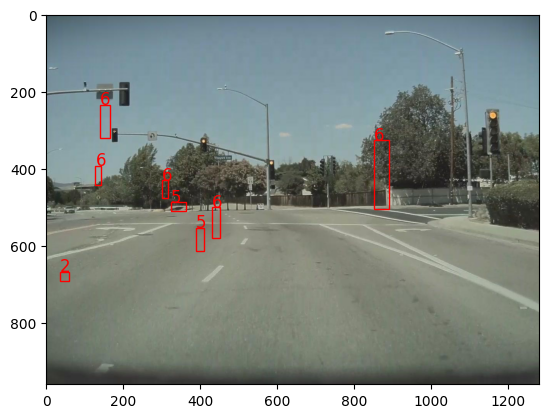

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to plot a single image with bounding boxes
def plot_boxes(image, matched_pairs):
        # Convert tensor image to PIL for display, if necessary
    if torch.is_tensor(image):
        pil_img = transforms.ToPILImage()(image).convert("RGB")
    else:
        pil_img = image  # Assuming image is already a PIL Image or a compatible format

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(pil_img)

    # Get the image dimensions
    img_height, img_width = image.shape[1:3]
    img_width,img_height = image.shape[1:3]
    print(img_height, img_width)

    # Plot each bounding box
    for pair in matched_pairs:
        for box in pair:
            if box and 'bbox' in box and box['bbox'] != [-1, -1, -1, -1]:
                # Get the details of the bounding box
                x_center, y_center, width, height = box['bbox']

                # Convert normalized coordinates to pixel coordinates
                x_center = x_center * img_width
                y_center = y_center * img_height
                width = width * img_width
                height = height * img_height

                # Calculate the top-left corner coordinates
                x = x_center - width / 2
                y = y_center - height / 2

                # Check if 'truebox' key exists and choose the color based on its value
                color = 'g' if 'truebox' in box and box['truebox'] else 'r'

                # Create a Rectangle patch
                rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor=color, facecolor='none')

                # Add the patch to the Axes
                ax.add_patch(rect)

                # Annotate the class label, if class is not None
                if 'class' in box and box['class'] is not None:
                    plt.text(x, y, str(box['class']), color=color, fontsize=12)

    plt.show()

# Example usage
# Assuming 'images' and 'matched_pairs' are already defined
image_id = 0  # Change this to choose which image to plot
matched_pairs_for_image = [pair for pair in matched_pairs if (pair[0] is not None and pair[0]['image_id'] == image_id) or (pair[1] is not None and pair[1]['image_id'] == image_id)]
plot_boxes(images[image_id], matched_pairs_for_image)


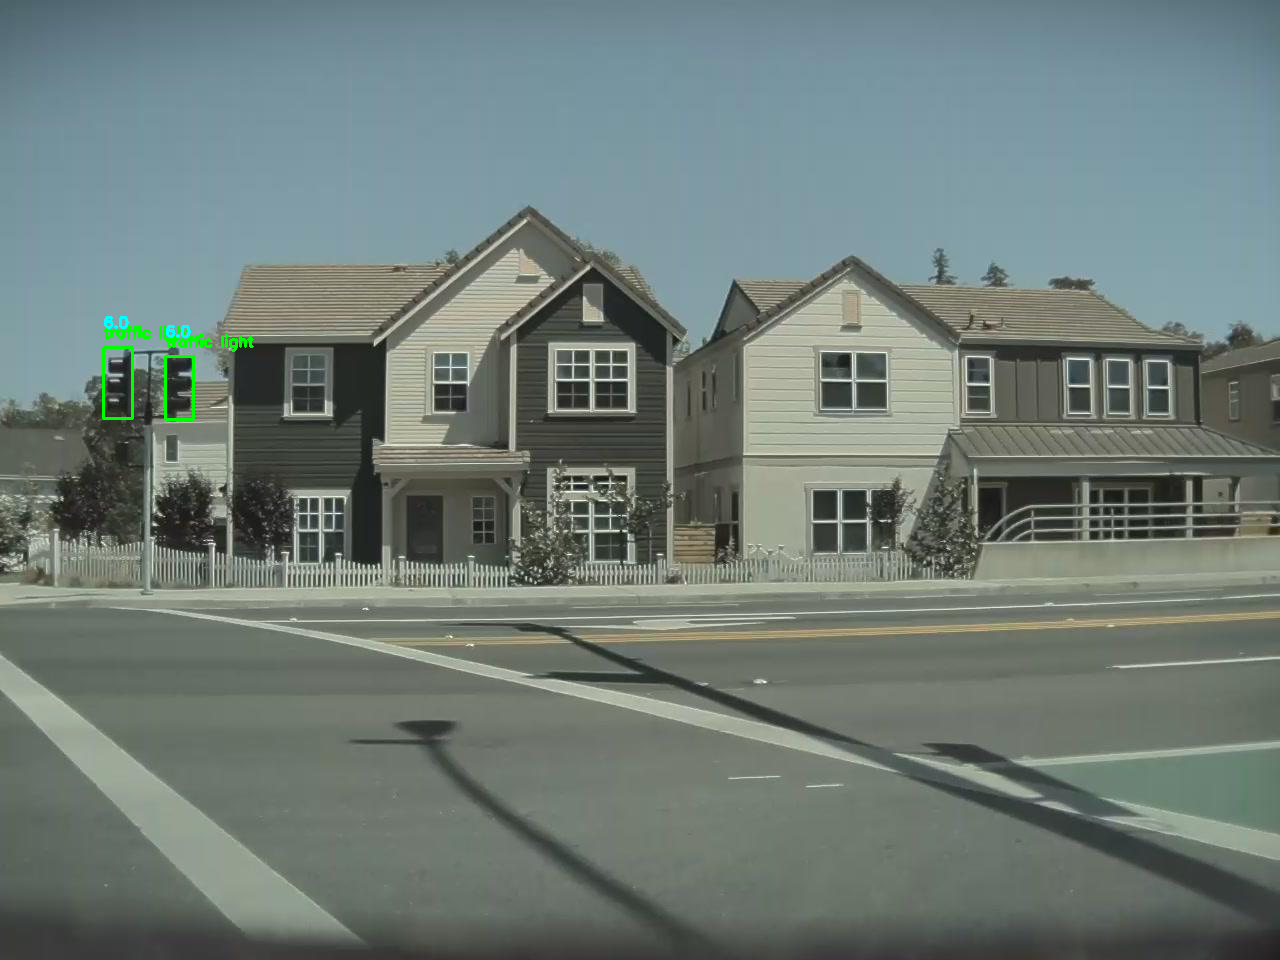

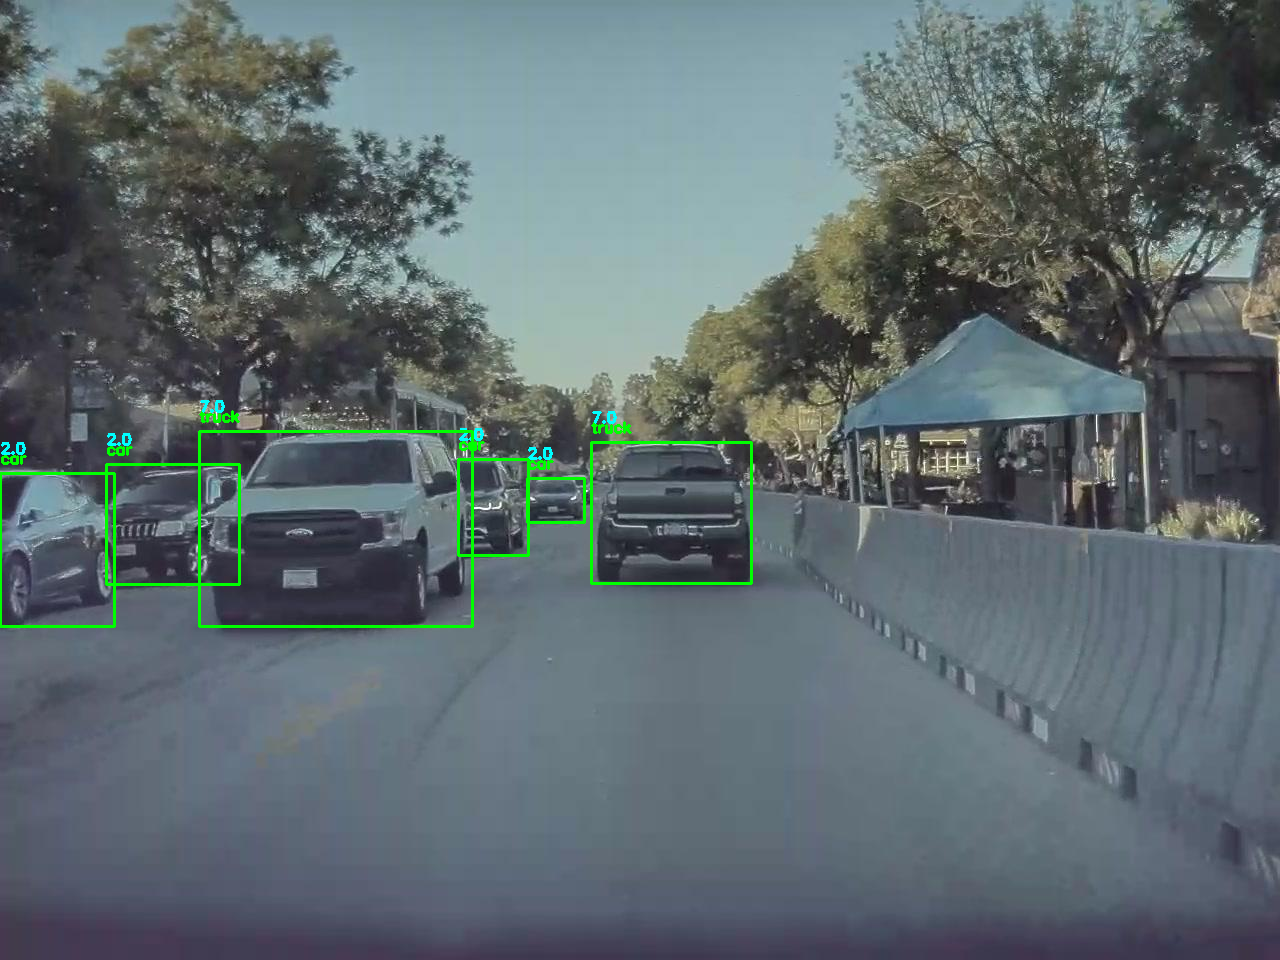

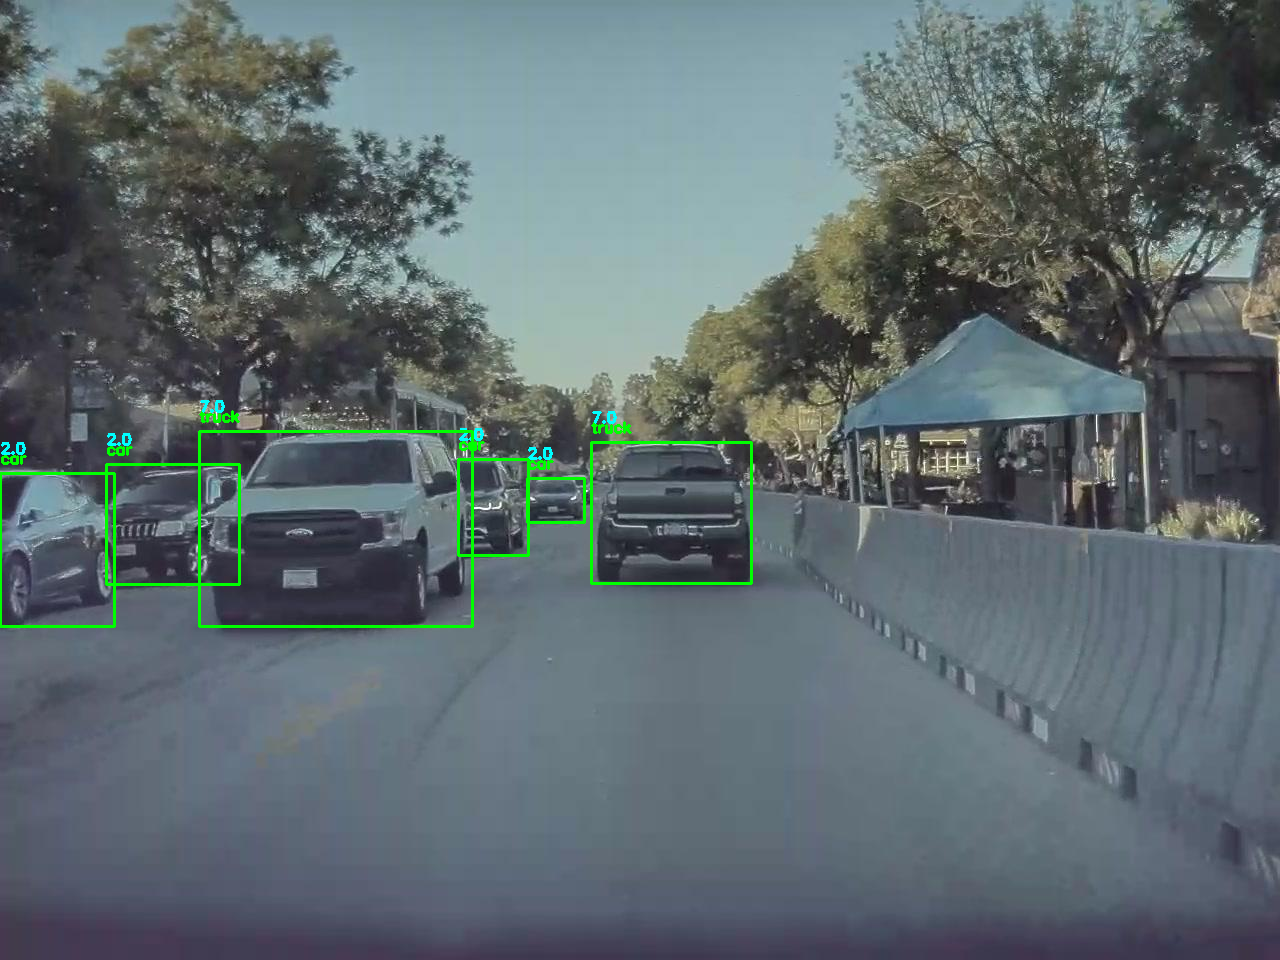

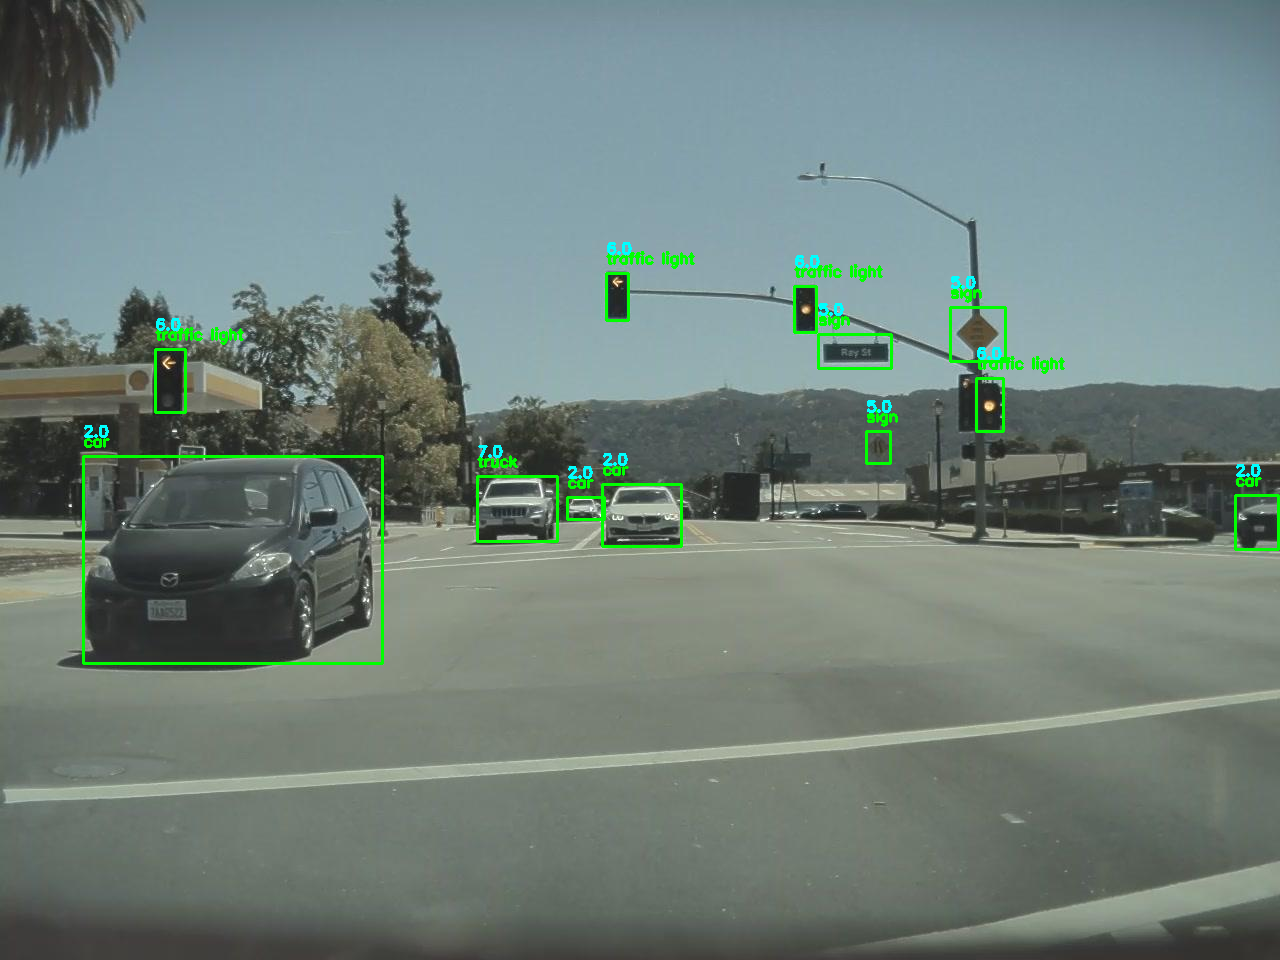

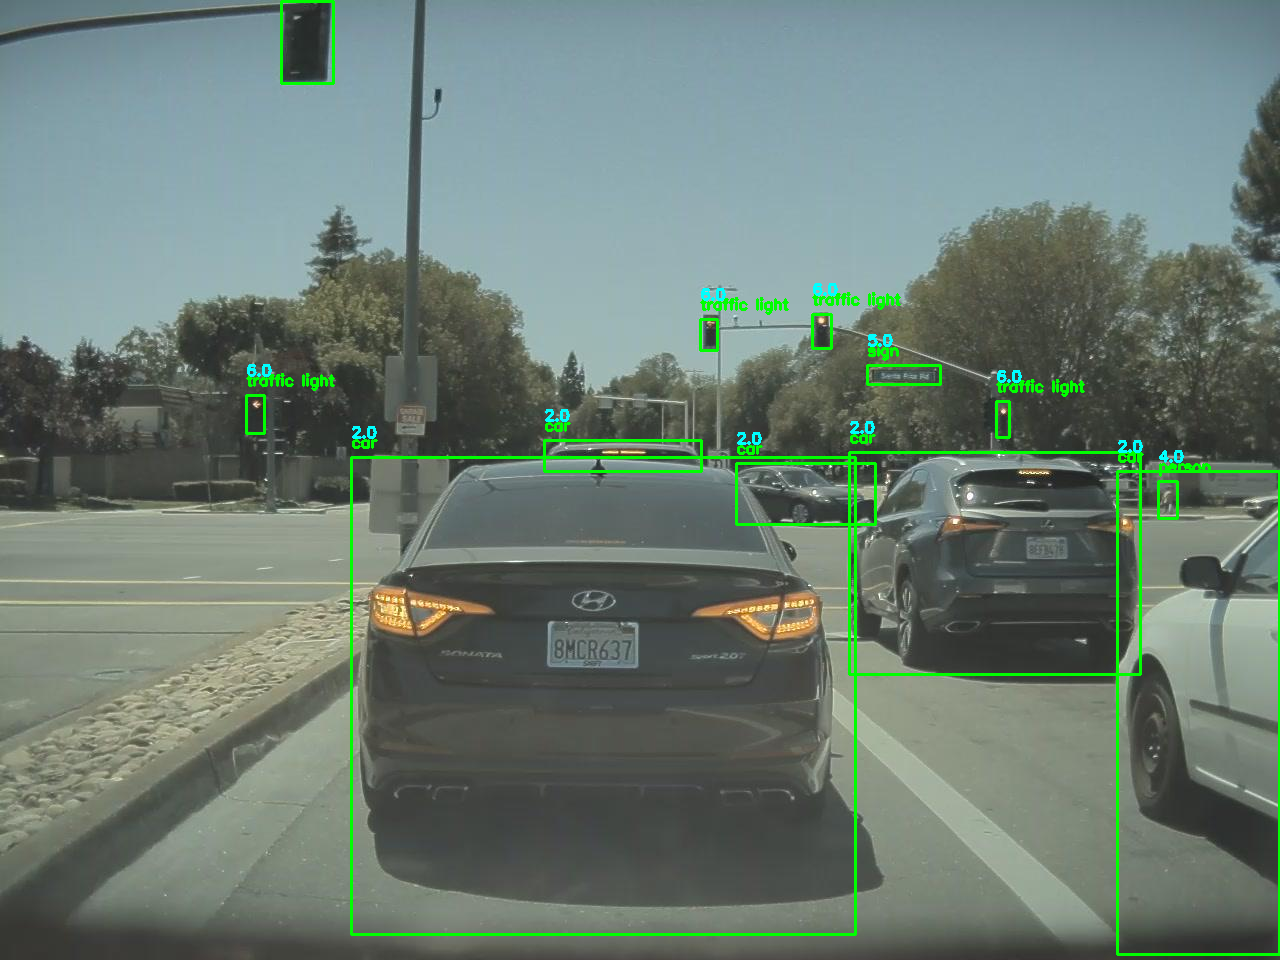

Some classes are missing in the test dataset.


In [26]:

import cv2
from google.colab.patches import cv2_imshow
import os
import yaml

# Load class names from data.yaml
with open('/content/drive/MyDrive/szakdoga/dashcamdatav1yoloformat/data.yaml', 'r') as file:
    data = yaml.safe_load(file)
    class_names = data['names']

# Function to draw bounding boxes and class names on image
def draw_labels(image_path, label_path, class_names):
    image = cv2.imread(image_path)

    with open(label_path, 'r') as file:
        for line in file.readlines():
            class_id, x_center, y_center, width, height = map(float, line.split())

            x_center *= image.shape[1]
            y_center *= image.shape[0]
            width *= image.shape[1]
            height *= image.shape[0]

            x_min = int(x_center - width / 2)
            y_min = int(y_center - height / 2)

            cv2.rectangle(image, (x_min, y_min), (x_min + int(width), y_min + int(height)), (0, 255, 0), 2)
            cv2.putText(image, class_names[int(class_id)], (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            cv2.putText(image, str(class_id), (x_min, y_min - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

    cv2_imshow(image)

# Paths
image_dir = '/content/drive/MyDrive/szakdoga/dashcamdatav1yoloformat/test/images'
label_dir = '/content/drive/MyDrive/szakdoga/dashcamdatav1yoloformat/test/labels'

# Find at least one image for each class
found_classes = set()
for image_name in os.listdir(image_dir):
    if image_name.endswith('.jpg'):
        label_name = image_name.replace('.jpg', '.txt')
        image_path = os.path.join(image_dir, image_name)
        label_path = os.path.join(label_dir, label_name)

        if os.path.exists(label_path):
            with open(label_path, 'r') as file:
                for line in file.readlines():
                    class_id = int(line.split()[0])
                    if class_id not in found_classes:
                        found_classes.add(class_id)
                        draw_labels(image_path, label_path, class_names)
                        if len(found_classes) == len(class_names):
                            break
    if len(found_classes) == len(class_names):
        break

if len(found_classes) != len(class_names):
    print("Some classes are missing in the test dataset.")


## Bounding Box Labeling
Draw bounding boxes and class names on images, and correct class labels.

In [27]:

def correct_class_labels(matched_pairs, label_mapping):
    corrected_pairs = []

    for pair in matched_pairs:
        true_box, pred_box = pair

        # Correct predicted class if mapping exists
        pred_box['class'] = label_mapping.get(pred_box['class'], pred_box['class'])
        corrected_pairs.append((true_box, pred_box))

    return corrected_pairs


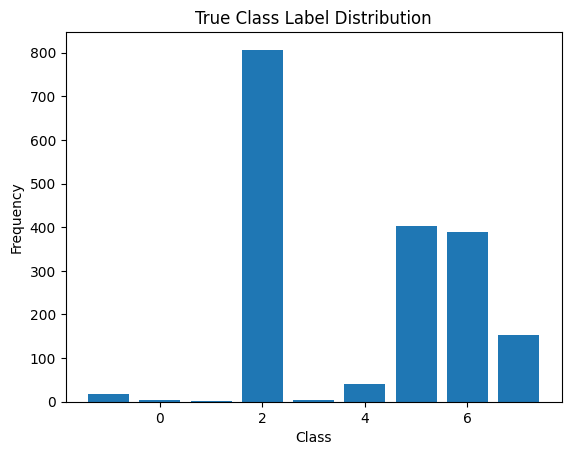

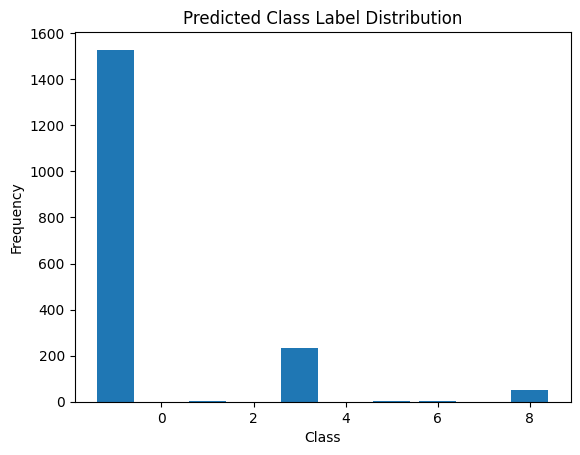

In [28]:
true_classes = []
predicted_classes = []

for pair in matched_pairs:
    true_box, predicted_box = pair
    true_classes.append(true_box['class'])
    predicted_classes.append(predicted_box['class'])

from collections import Counter

true_class_counts = Counter(true_classes)
predicted_class_counts = Counter(predicted_classes)

import matplotlib.pyplot as plt

# Function to plot class distributions
def plot_class_distributions(class_counts, title):
    labels, values = zip(*class_counts.items())

    # Sort the classes by label for consistent plotting
    labels, values = zip(*sorted(zip(labels, values)))

    plt.bar(labels, values)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Plotting
plot_class_distributions(true_class_counts, 'True Class Label Distribution')
plot_class_distributions(predicted_class_counts, 'Predicted Class Label Distribution')


In [29]:
def extract_class_encodings(matched_pairs):
    true_class_encodings = set()
    pred_class_encodings = set()

    for pair in matched_pairs:
        true_class_encodings.add(pair[0]['class'])
        pred_class_encodings.add(pair[1]['class'])

    return list(true_class_encodings), list(pred_class_encodings)

# Example usage
true_class_encodings, pred_class_encodings = extract_class_encodings(matched_pairs)
print(f"True class encodings: {true_class_encodings}")
print(f"Predicted class encodings: {pred_class_encodings}")


True class encodings: [0, 1, 2, 3, 4, 5, 6, 7, -1]
Predicted class encodings: [1, 3, 5, 6, 8, -1]


In [30]:
def find_most_likely_mappings(matched_pairs):
    mapping_frequency = {}

    # Count frequency of matches
    for pair in matched_pairs:
        true_class = pair[0]['class']
        pred_class = pair[1]['class']
        if pred_class not in mapping_frequency:
            mapping_frequency[pred_class] = {}
        if true_class not in mapping_frequency[pred_class]:
            mapping_frequency[pred_class][true_class] = 0
        mapping_frequency[pred_class][true_class] += 1

    # Determine most likely mappings and frequencies
    most_likely_mapping = {}
    for pred_class, true_class_freq in mapping_frequency.items():
        most_likely_true_class = max(true_class_freq, key=true_class_freq.get)
        most_likely_mapping[pred_class] = (most_likely_true_class, true_class_freq[most_likely_true_class])

    return most_likely_mapping, mapping_frequency

# Example usage
most_likely_mapping, mapping_frequency = find_most_likely_mappings(matched_pairs)
print("Heuristic Mapping with Frequencies:")
for pred_class, (true_class, freq) in most_likely_mapping.items():
    print(f"Predicted Class {pred_class} -> True Class {true_class}, Frequency: {freq}")


Heuristic Mapping with Frequencies:
Predicted Class -1 -> True Class 2, Frequency: 597
Predicted Class 1 -> True Class 4, Frequency: 4
Predicted Class 3 -> True Class 2, Frequency: 209
Predicted Class 8 -> True Class 7, Frequency: 47
Predicted Class 5 -> True Class -1, Frequency: 2
Predicted Class 6 -> True Class -1, Frequency: 3


In [31]:
# Heuristic Mapping (Just for Visualization and Checking)
most_likely_mapping, mapping_frequency = find_most_likely_mappings(matched_pairs)
print("Heuristic Mapping with Frequencies:")
for pred_class, (true_class, freq) in most_likely_mapping.items():
    print(f"Predicted Class {pred_class} -> True Class {true_class}, Frequency: {freq}")

# Manual Mapping (Actual Correction)
manual_mapping = {
    # Your mappings here
    10: 6, # traffic light
    3: 2, # car
    1: 4, # person
    8: 7, # truck
    2: 0, # bicycle
    4: 3, # motorcycle
    6: 1, # bus
    13: 5 # stop sign (sign)

    # Add more mappings as needed
}

# Apply Manual Mappings
corrected_matched_pairs = correct_class_labels(matched_pairs, manual_mapping) # matched_pairs, {k: v[0] for k, v in most_likely_mapping.items()}

# Print to verify
print("\nCorrected Matched Pairs:")
for pair in corrected_matched_pairs:
    print(pair)




Heuristic Mapping with Frequencies:
Predicted Class -1 -> True Class 2, Frequency: 597
Predicted Class 1 -> True Class 4, Frequency: 4
Predicted Class 3 -> True Class 2, Frequency: 209
Predicted Class 8 -> True Class 7, Frequency: 47
Predicted Class 5 -> True Class -1, Frequency: 2
Predicted Class 6 -> True Class -1, Frequency: 3

Corrected Matched Pairs:
({'image_id': 0, 'class': 6, 'bbox': [0.15906250476837158, 0.21595832705497742, 0.025648437440395355, 0.06679166853427887]}, {'image_id': -1, 'class': -1, 'bbox': [-1, -1, -1, -1], 'bboxID': -1, 'truebox': -1})
({'image_id': 0, 'class': 6, 'bbox': [0.9070390462875366, 0.324072927236557, 0.042781248688697815, 0.13831250369548798]}, {'image_id': -1, 'class': -1, 'bbox': [-1, -1, -1, -1], 'bboxID': -1, 'truebox': -1})
({'image_id': 0, 'class': 6, 'bbox': [0.14031249284744263, 0.32623958587646484, 0.014421874657273293, 0.03967708349227905]}, {'image_id': -1, 'class': -1, 'bbox': [-1, -1, -1, -1], 'bboxID': -1, 'truebox': -1})
({'image_id'

## Class Label Filtering: Refines the dataset by focusing on relevant classes and ensuring label accuracy.

In [32]:
# New function to delete unnecessary classnames
def delete_unnecessary_classnames(corrected_matched_pairs, valid_classes=range(-1,8)):
    """
    Filter out classnames that are not in the range of valid classes (0-7).
    """
    filtered_pairs = []
    for pair in corrected_matched_pairs:
        if pair[1]['class'] in valid_classes:
            #print(pair[0]['class'])
            filtered_pairs.append(pair)
    return filtered_pairs

# ... Rest of your code ...

# After correcting class labels
corrected_matched_pairs = delete_unnecessary_classnames(corrected_matched_pairs)

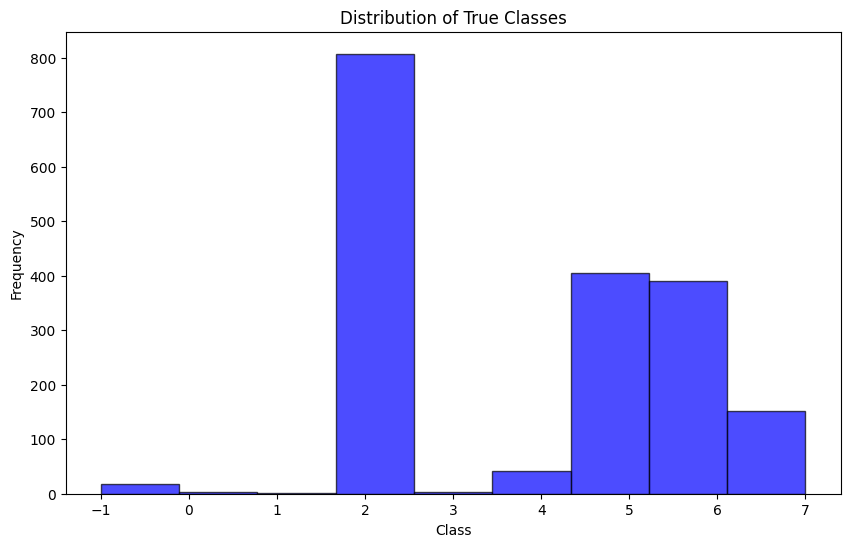

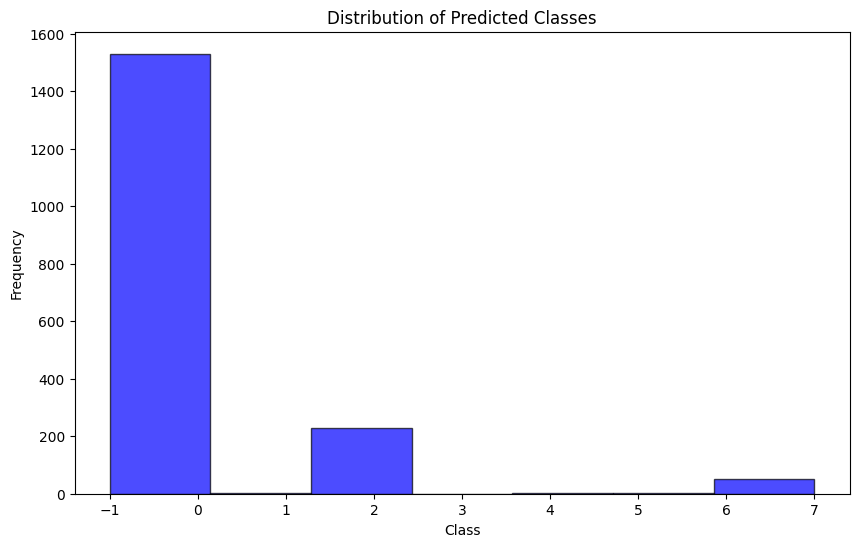

In [33]:
true_classes = []
predicted_classes = []

for pair in matched_pairs:
    true_box, predicted_box = pair
    true_classes.append(true_box['class'])
    predicted_classes.append(predicted_box['class'])


def plot_class_distribution(classes, title):
    plt.figure(figsize=(10, 6))
    plt.hist(classes, bins=len(set(classes)), alpha=0.7, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks(range(min(classes), max(classes) + 1))  # Adjust x-ticks if necessary
    plt.show()

# Plotting True Classes Distribution
plot_class_distribution(true_classes, "Distribution of True Classes")

# Plotting Predicted Classes Distribution
plot_class_distribution(predicted_classes, "Distribution of Predicted Classes")


## Metrics Visualization: Visually represents the model's performance across different classes and the distribution of IoU scores.

In [34]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

# Extract true and predicted labels from matched pairs
true_labels = [pair[0]['class'] for pair in corrected_matched_pairs]
pred_labels = [pair[1]['class'] for pair in corrected_matched_pairs]



# Calculate Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average='weighted') # Use average='binary' for binary classification
recall = recall_score(true_labels, pred_labels, average='weighted') # Use average='binary' for binary classification
f1 = f1_score(true_labels, pred_labels, average='weighted') # Use average='binary' for binary classification

# Calculate mean IoU, skipping pairs with placeholders
ious = []
for pair in matched_pairs:
    if pair[0] is not None and pair[1] is not None and pair[0]['bbox'] != [-1, -1, -1, -1] and pair[1]['bbox'] != [-1, -1, -1, -1]:
        iou = calculate_iou(pair[0]['bbox'], pair[1]['bbox'])
        ious.append(iou)

mean_iou = sum(ious) / len(ious) if ious else 0  # avoid division by zero


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Mean IoU: {mean_iou}")


Accuracy: 0.14733369983507422
Precision: 0.5004349953515682
Recall: 0.14733369983507422
F1 Score: 0.220131424843059
Mean IoU: 0.8716123781088002


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print(ious)

[0.6691186482067895, 0.8065283946111648, 0.965601521554514, 0.7243340310160642, 0.861039137959111, 0.884846674600782, 0.8439301952354394, 0.8079411197281151, 0.7847662086683423, 0.9601055330201385, 0.9108672976527143, 0.9187367325541432, 0.8712309610553655, 0.8938407286824213, 0.913166444540157, 0.9479042276283995, 0.859246408705374, 0.8940442231524183, 0.8521875254554864, 0.8963626861743403, 0.8751973521757139, 0.8968506529932398, 0.8783098918064332, 0.8407731383369816, 0.743136246372781, 0.904961436594997, 0.8821240922942558, 0.8622106220845269, 0.9309951500370589, 0.8699672668988018, 0.8739588684786895, 0.8676750507068077, 0.8939353418573774, 0.9345345949030598, 0.877307671799846, 0.8559976243757481, 0.8915980519811271, 0.9540535653034705, 0.896649196768477, 0.9013514362031901, 0.8749772692833983, 0.8390605477756867, 0.9317862469807675, 0.8888809624006768, 0.9449252473782722, 0.9205960414512994, 0.8862219259144943, 0.8855402641361872, 0.8914784660128952, 0.8806804372093379, 0.848244

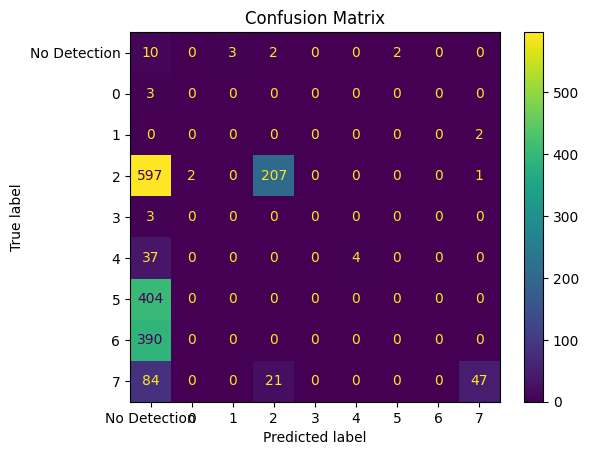

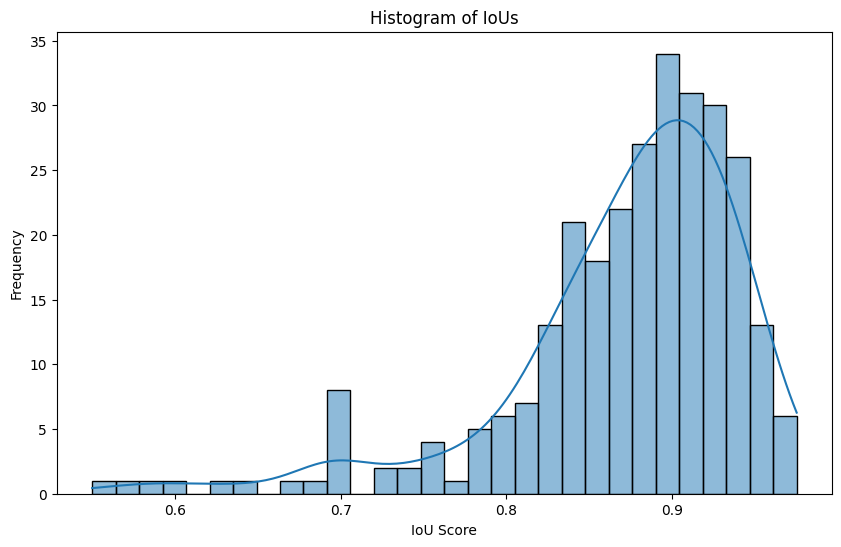

{0, 1, 2, 3, 4, 5, 6, 7, -1}
{0, 1, 2, 4, 5, 7, -1}


In [36]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Extract true labels and predicted labels from matched pairs
true_labels = [pair[0]['class'] if pair[0] is not None else -1 for pair in corrected_matched_pairs]
pred_labels = [pair[1]['class'] if pair[1] is not None else -1 for pair in corrected_matched_pairs]

# Extract the unique classes from true and predicted labels
all_labels = sorted(set(true_labels) | set(pred_labels))

# Create a mapping for labels to indices
label_to_index = {label: index for index, label in enumerate(all_labels)}

# Convert class labels to indices
true_label_indices = [label_to_index[label] for label in true_labels]
pred_label_indices = [label_to_index[label] for label in pred_labels]

# Calculate the confusion matrix using indices
conf_mat = confusion_matrix(true_label_indices, pred_label_indices, labels=range(len(all_labels)))

# Map the indices back to the original class labels for display
display_labels = [str(label) for label in all_labels]
if -1 in all_labels:  # Replace -1 with 'No Detection' for display purposes
    display_labels[all_labels.index(-1)] = 'No Detection'

# Create a ConfusionMatrixDisplay instance with the dynamically created class names
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=display_labels)

# Plot the confusion matrix
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()




# 3. Histogram of IoUs
plt.figure(figsize=(10, 6))
sns.histplot(ious, kde=True, bins=30)
plt.title('Histogram of IoUs')
plt.xlabel('IoU Score')
plt.ylabel('Frequency')
plt.show()


print(set(true_labels))
print(set(pred_labels))